<a href="https://colab.research.google.com/github/justinb4003/4003colab/blob/main/Copy_of_205_Lab_1_k_means_(Cameron%2C_Justin_b%2C_ben_h).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1:  k-means clustering #

**Due:  by 4 pm on Monday, September 18**

Work in groups of 2 or 3 students.

Make a copy of this notebook so you can edit it, and put the last names of your group members in place of "students" in the title.  When your work is complete, print this file to PDF and save the PDF.  In addition, scan your work on Activity 6.1.4 to PDF.  Upload both files to Blackboard under the Lab 1 Assignment.

This lab will be marked on a 25 point scale.  10 points are allocated to Activity 6.1.4, and 15 points to this notebook.  In Activity 6.1.4, the allocations are (a) - 2, (b) - 2, (c) - 1, (d) - 3, (e) - 2.  In the notebook, were you see notation such as "[3]", that indicates that responding to that prompt is correlated to 3 of the 25 points.  In many of those questions, you are prompted to complete a sentence that is noted *in italics*.

**Group members:**  (double-click here to enter)

This lab will introduce you further to a machine learning algorithm called *k-means clustering*.  Sometimes we have a large collection of data and believe that it breaks naturally into groups. For instance, we could be looking at medical data from a group of patients who have either type 1 or type 2 diabetes. We would expect that data from a type 1 patient would be similar to other type 1 patients and somewhat distinct from type 2 patients.

Now that we can measure the length of vectors, we can develop a measure of when
two data points are similar. More specifically, we imagine representing the individual pieces of information corresponding to a single patient as a vector. If patients are similar, their vectors should lie close to one another. In the case of diabetes patients, we might expect that the vectors from the two types would cluster together. The problem is that we may have a lot of data about the patients—age, weight, etc—so the vectors may be high dimensional and hence not easily visualized.

When you evaluate the following cell, you will load a module that allows you to use Sage syntax.  You will also load in a dataset with 152 2-dimensional points and display them.  Our eventual goal is to break the dataset into clusters.

Cloning into 'mth205'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 637 (delta 57), reused 108 (delta 36), pack-reused 491
Receiving objects: 100% (637/637), 659.82 KiB | 14.66 MiB/s, done.
Resolving deltas: 100% (251/251), done.


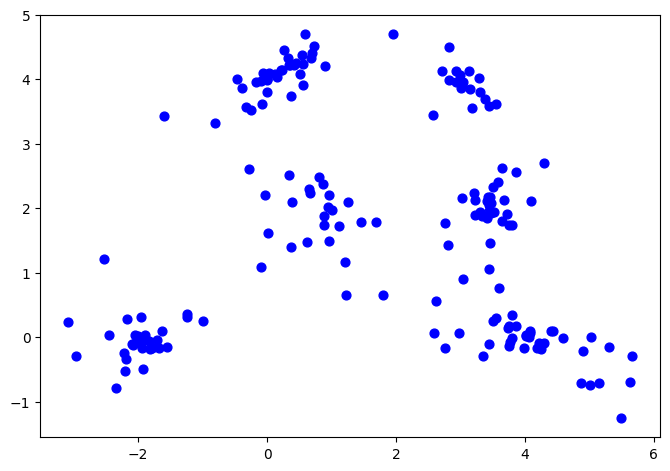

In [1]:
!rm -rf mth205/
!mkdir -p mth205
!git clone https://github.com/davidaustinm/MTH205-W20.git mth205/
import sys
sys.path.append('/content/mth205/libs')
from mth205 import *
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

def kmeans(data, k):
    N = 15
    centroids = np.random.choice(data, k)
    for _ in range(N):
      clusters = [ [] for __ in range(k)]
      for datum in data:
        distances = [ (datum - centroids[j]).norm() for j in range(k)]
        clusters[np.argmin(distances)].append(datum)
      centroids = [mean(clusters[j]) if len(clusters[j]) > 0 else centroids[j] for j in range(k)]
    distances = [sum([ (clusters[i][j] - centroids[i]).norm()**2 for j in range(len(clusters[i]))]) for i in range(len(clusters))]
    return [clusters, centroids, sum(distances)/len(data)]

def plotclusters(clusters, centroids, figsize=(8,8)):
    k = len(clusters)
    cmap = matplotlib.colormaps['hsv'].resampled(k+1)
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect(1)
    for j in range(k):
        X, Y = np.array([v.entries for v in clusters[j]]).T
        ax.scatter(x=X, y=Y, c=[cmap(j)]*len(clusters[j]))
    if len(centroids) > 0:
        X, Y = np.array([c.entries for c in centroids]).T
        ax.scatter(x=X,y=Y, s=75, c='black')

df = pd.read_csv('/content/mth205/data/clusters_data.csv')
data = [vector(row) for row in df.values]
list_plot(data, size=40, aspect_ratio=1, dims=(8, 8))

### Part 1:  Centroids - completed by hand in Act 6.1.4 ###

(If you want to check your work in Act 6.1.4, you can carefully read this part that is an electronic version of that activity, but you need not do so.  This is just included here for completeness.  Nonetheless, you should execute the code here to load the vectors and clusters we worked with in Activity 6.1.4 so that you can use them later in the lab.)

Throughout this lab, we will think of a point $(x,y)$ as defining a vector $\begin{bmatrix} x \\ y \\ \end{bmatrix}$ and vice-versa.

The centroid of a collection of vectors ${\mathbf v}_1, {\mathbf v}_2, \ldots, {\mathbf v}_n$ is defined to be the point (or vector)
$$
\frac1n({\mathbf v}_1 + {\mathbf v}_2 + \ldots + {\mathbf v}_n).
$$

Suppose we start with a simple set of three points (or vectors):
$$
{\mathbf v}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix},
{\mathbf v}_2 = \begin{bmatrix} 4 \\ 1 \end{bmatrix},
{\mathbf v}_3 = \begin{bmatrix} 4 \\ 4 \end{bmatrix}.
$$

The following cell defines these vectors and plots them.


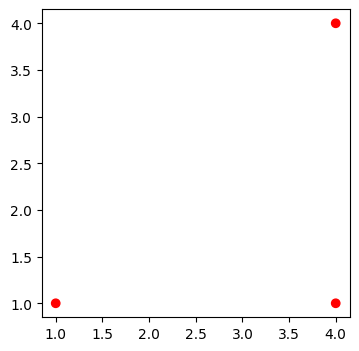

In [2]:
v1 = vector([1,1])
v2 = vector([4,1])
v3 = vector([4,4])
plotclusters([[v1, v2, v3]], [], figsize=(4,4))

Find the centroid of these three points and define it to be <code>centroid</code>.

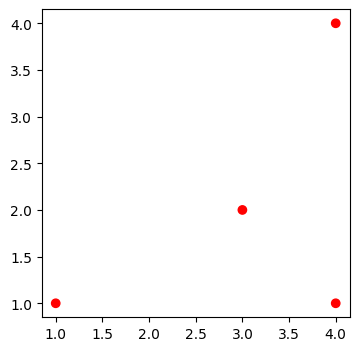

In [3]:
v1 = vector([1,1])
v2 = vector([4,1])
v3 = vector([4,4])
centroid = vector([3,2])  # define the centroid as the vector you've found
plotclusters([[v1, v2, v3, centroid]], [], figsize=(4,4))

Evaluating the next cell will display the data points and the centroid in black.  Notice how the centroid is "centrally" located.

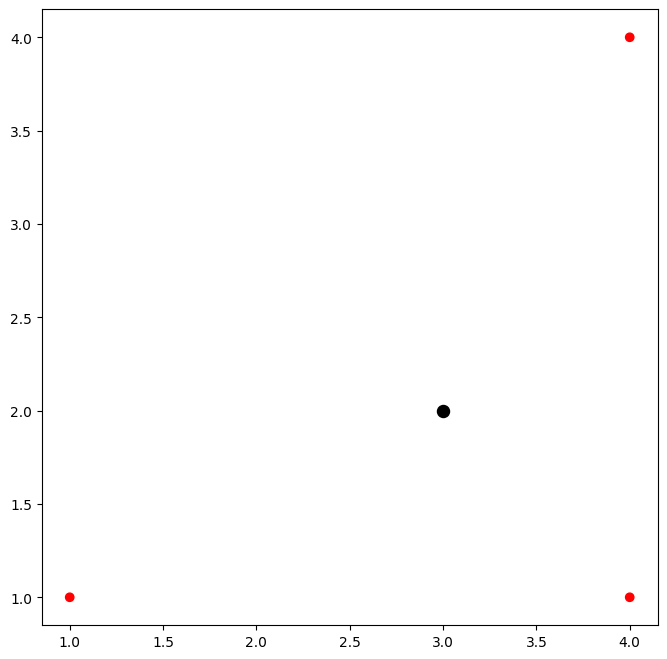

In [4]:
plotclusters([[v1, v2, v3]], [centroid])

### Part 2:  Constructing a clustering - completed by hand in Act 6.1.4 ###

(Again, if you want to check your work in Act 6.1.4, you can do this part that is an electronic version of that activity, but you need not do so.  This is just included here for completeness.)

We will now see how to break a dataset up into clusters.  Let's look at a simple dataset consisting of the following four points:
$$
{\mathbf v}_1 = \begin{bmatrix} -2 \\ 1 \end{bmatrix},
{\mathbf v}_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix},
{\mathbf v}_3 = \begin{bmatrix} 1 \\ 2 \end{bmatrix},
{\mathbf v}_4 = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
$$
and split the points into two clusters.  Evaluate the following cell to visualize the data points.



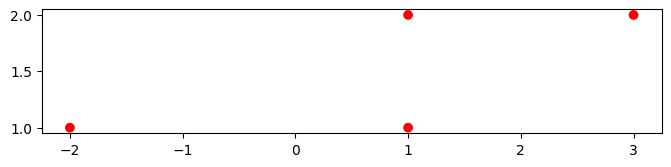

In [5]:
v1 = vector([-2,1])
v2 = vector([1,1])
v3 = vector([1,2])
v4 = vector([3,2])
plotclusters([[v1, v2, v3, v4]], [])

Here's how the algorithm works:
* Since we want to split the points into two clusters, we will randomly choose two points $c_1$ and $c_2$.  For our random choice, we will choose
$c_1 = {\mathbf v}_2$ and $c_2 = {\mathbf v}_3$.
* Break the data points ${\mathbf v}_1,\ldots,{\mathbf v}_4$ into two clusters $C_1$ and $C_2$.  The first cluster $C_1$ consists of the points that are closer to $c_1$ than to $c_2$.  The second cluster $C_2$ consists of the points that are closer to $c_2$ than to $c_1$.  

Enter your clusters in the next cell.  For instance, if $C_1 = \{{\mathbf v}_1, {\mathbf v}_4\}$, you can enter:

<code> C1 = [ v1, v4 ] </code>

Note:  this is just illustrating how to input a cluster, not that this is the cluster asked for below.

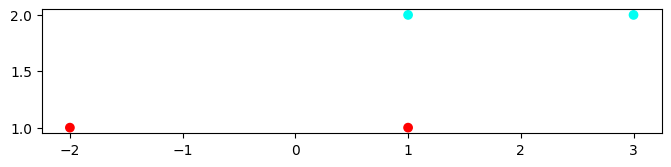

In [6]:
C1 = [v1, v2 ] # enter your first cluster here
C2 = [v3, v4 ] # enter your second cluster here
plotclusters([C1, C2], [])

* Now update the points $c_1$ and $c_2$ by setting $c_1$ to be the centroid of the cluster $C_1$ and $c_2$ to be the centroid of the cluster $C_2$.

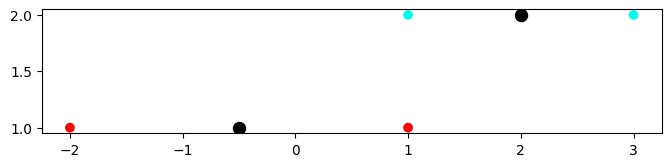

In [7]:
c1 = vector([-0.5, 1 ])  # find the first centroid and enter its coordinates here
c2 = vector([2, 2])  # find the second centroid and enter its coordinates here
plotclusters([C1, C2], [c1, c2])

* Now we update the clusters $C_1$ to be the set of data points that are closer to $c_1$ than $c_2$ and $C_2$ to be the set of data points that are closer to $c_2$ than $c_1$.  Note that you can find the distance between two points, represented as vectors, by <code>(u - v).norm()</code>.

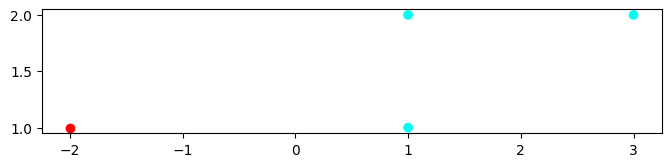

In [8]:
C1 = [v1] # enter the updated first cluster
C2 = [v2, v3, v4 ]  # enter the updated second cluster
plotclusters([C1, C2], [])

* Now update the centroids one last time.  

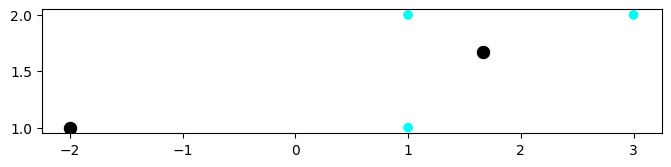

In [21]:
c1 = vector([-2, 1])  # find and enter the updated first centroid
c2 = vector([5/3, 5/3])  # find and enter the udpated second centroid
plotclusters([C1, C2], [c1, c2])

At this point, if we update the clusters $C_1$ and $C_2$ as before, we will find the same clusters and the same centroids.  This means that there is no point in continuing so we declare this to be our final clustering.

### Part 3:  The objective function ###

As we'll see in a moment, there are many different clusterings so we would like to have a way to measure how good a clustering is.  For instance, we feel like a clustering is good if all the points in a cluster are close to their cluster's centroid.  We therefore define the *objective* of the clusterings to be the average, taken over all data points, of the square of the distance from each data point to the centroid of its cluster.  The smaller the objective is, the better the clustering because that implies that the points are generally close to their centroids so we have tight clusters.

[3] Find the objective of the first clustering we found in Activity 6.1.4:  the one with centroids $c_1 = \mathbf{v}_1$ and $c_2 = (\frac{5}{3}, \frac{5}{3})$ that uses $C_1 = \mathbf{v}_1$  and $C_2 = \{\mathbf{v}_2, \mathbf{v}_3, \mathbf{v}_4\}$.  

Notice that you can find the square of the distance between two points using

<code>(u - v).norm()**2</code>

Enter your code to accomplish this in the cell below, and complete the following sentence in italics that states your conclusion.

*The objective of this clustering is*

In [22]:
# We want to calculate the average distance from each vector to its centroid.
# Start by setting a variable to 0

d = 0
# Now add in each distance
d += (c1 - v1).norm()**2
d += (c2 - v2).norm()**2
d += (c2 - v3).norm()**2
d += (c2 - v4).norm()**2
# Find the average
objective = d / 4
objective


0.8333333333333334

Remember that our algorithm begins by randomly choosing points $c_1$ and $c_2$ from the set of data points.  If we had made a different choice, we would have obtained a different clustering.  For instance, if $c_1 = {\mathbf v}_3$ and $c_2 = {\mathbf v}_4$, then we would have obtained the clustering

$$
C_1 = \{{\mathbf v}_1, {\mathbf v}_2, {\mathbf v}_3\},
C_2 = \{{\mathbf v}_4\}.
$$

1.6666666666666665

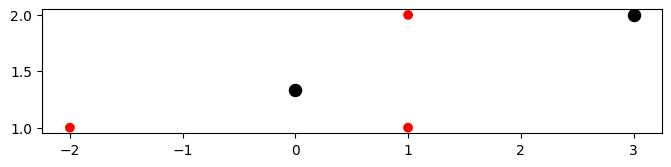

In [31]:
c1 = vector([0, 4/3])
c2 = vector([3, 2])
plotclusters([[v1, v2, v3], [v4]], [c1, c2])

d = 0
# Now add in each distance
d += (c1 - v1).norm()**2
d += (c1 - v2).norm()**2
d += (c1 - v3).norm()**2
d += (c2 - v4).norm()**2
# Find the average
objective = d / 4
objective


[2] How does this clustering compare to the one you found above?  What is the objective of this second clustering?

Write a sentence to explain visually how the two clusterings compare, compute the objective of the second clustering in the cell below, and then write one more sentence (to finish the one started below) to say how this affirms your visual observations.

*Comparing the clusters, we see ...*

In [ ]:
# We see our first clustering obtained 0.83 objective and the second was 1.6, almost twice as high, so we don't like it as much

### Part 4:  A more realistic example ###

Evaluate the cell below to look at a larger data set.

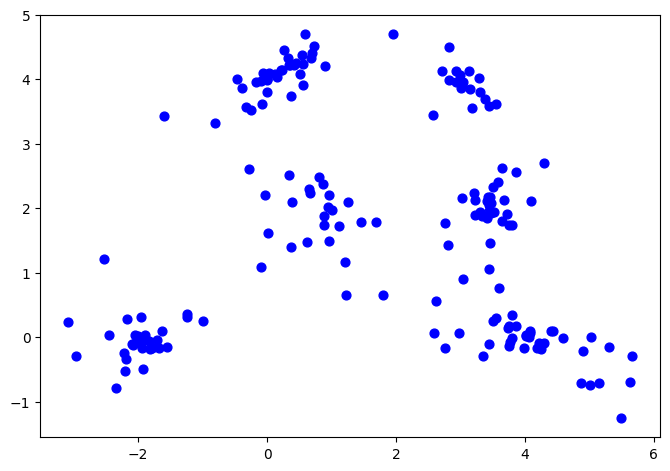

In [32]:
data = [vector(row) for row in df.values]
list_plot(data, size=40, aspect_ratio=1, dims=(8, 8))

[1] By visually inspecting, what do you think would be a good number of clusters into which to group these points?  Double click this cell and record your observation below.  We will compare it to the value we find algorithmically.

**Our guess for the number of clusters is ** 6


Evaluating the cell below will create a clustering with two clusters, print the value of the objective, and plot the clusters in different colors.  The centroids of the clusters are also shown in black.

Objective = 3.901122984659044


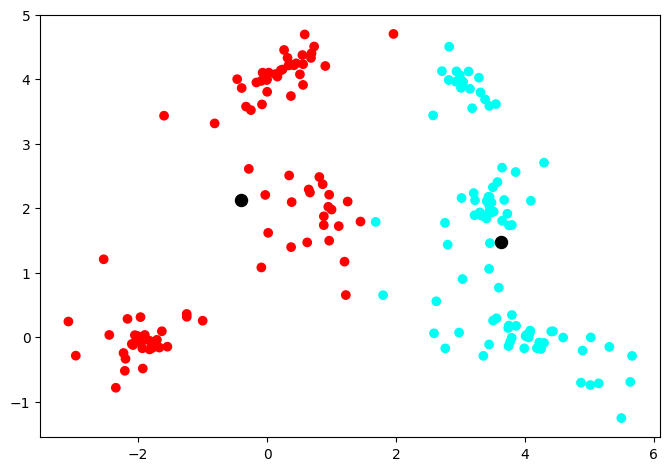

In [62]:
k = 2
clusters, centroids, objective = kmeans(data, k)
print ("Objective =", objective)
plotclusters(clusters, centroids)

Evaluate the cell above several times.  You should notice that the clusterings and their objectives change;  this is because we are randomly choosing two points to start the algorithm, and this choice leads to different final clusterings.  

You should also run the algorithm with $k=6$ several times.  Notice that clusterings with a lower objective look like better clusterings.

In practice, we run the algorithm many times and choose the clustering with the smallest objective.  If you evaluate the cell below, you will have a function that, when given a value of $k$, finds 10 clusterings for that $k$-value and picks out the one with the smallest objective.  Go ahead and evaluate that cell now, and we'll use it in the cells below.

In [63]:
from operator import itemgetter
def minimalobjective(data, k):
    results = [kmeans(data, k) for _ in range(10)]
    results = sorted(results, key=itemgetter(2))
    return results[0]

The next cell below sets a value for $k$ and then finds the clustering with the lowest objective, prints out the objective, and displays the clustering.  Evaluate this cell for $k=2,3,4,\ldots, 9$.  For each value of $k$, notice how the clusterings and the objectives change.

[3] Record the results of your executions in the text below by double-clicking here and adding ordered pairs of the form "(k, Objective(k))" to complete a "table".

*Our table of values is*

(2, 3.901)

(3,

k = Objective = 2 3.901122984659044
k = Objective = 3 1.873062766708815
k = Objective = 4 1.092997643795226
k = Objective = 5 0.6612527414477449
k = Objective = 6 0.41647731792079834
k = Objective = 7 0.32442975817929415
k = Objective = 8 0.29134311458231166
k = Objective = 9 0.24497596952678044
k = Objective = 10 0.25148226751803604


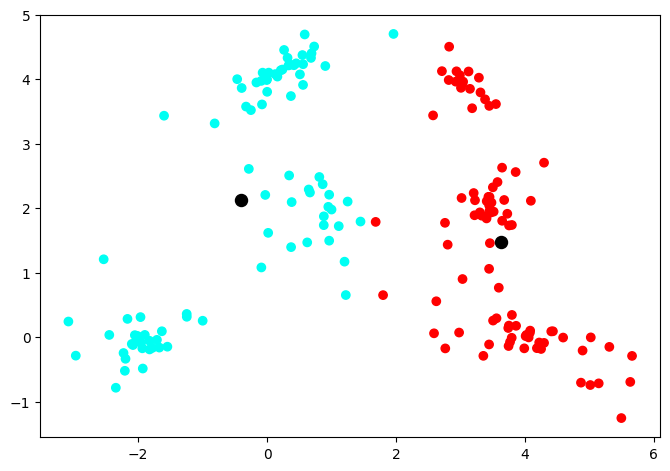

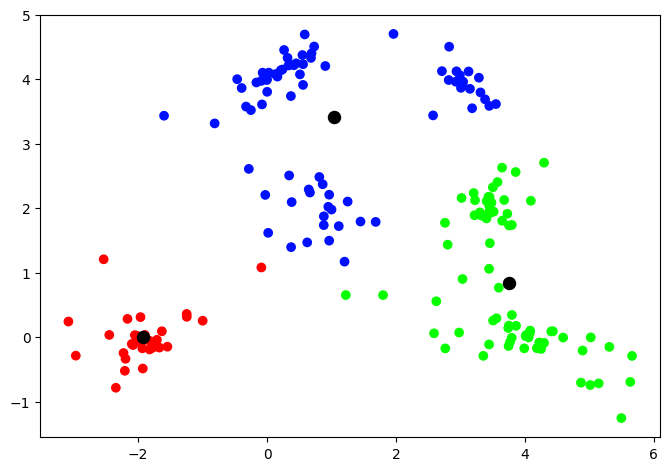

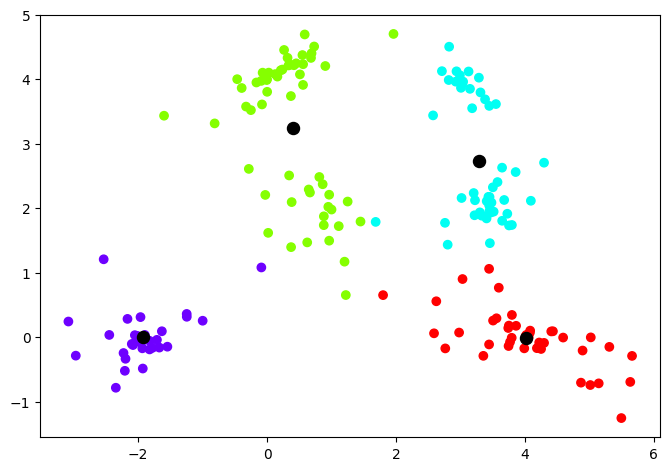

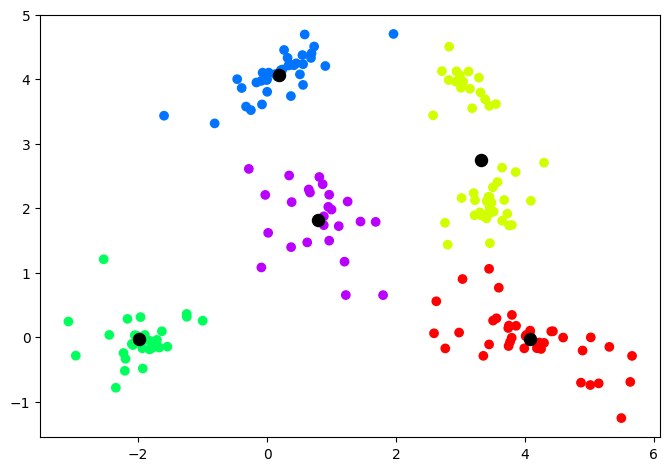

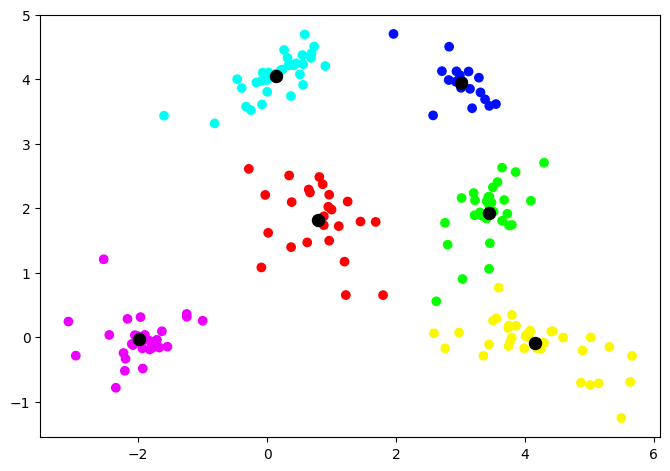

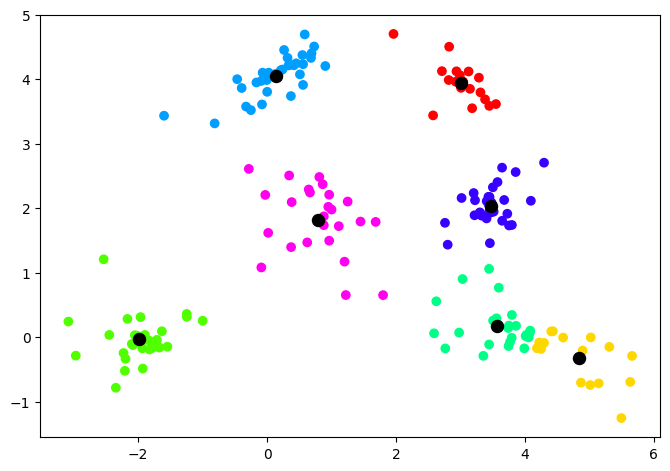

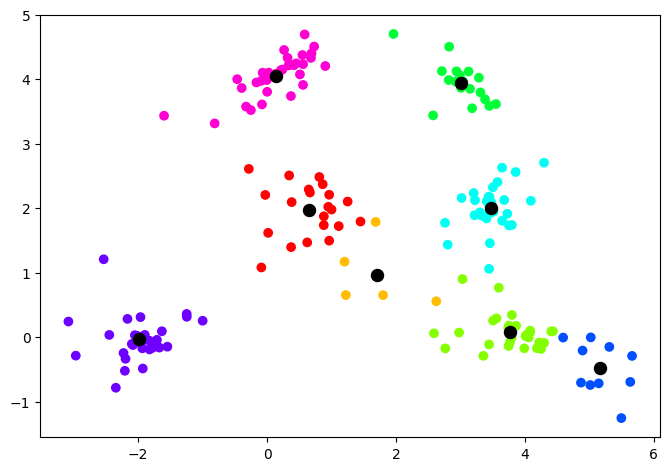

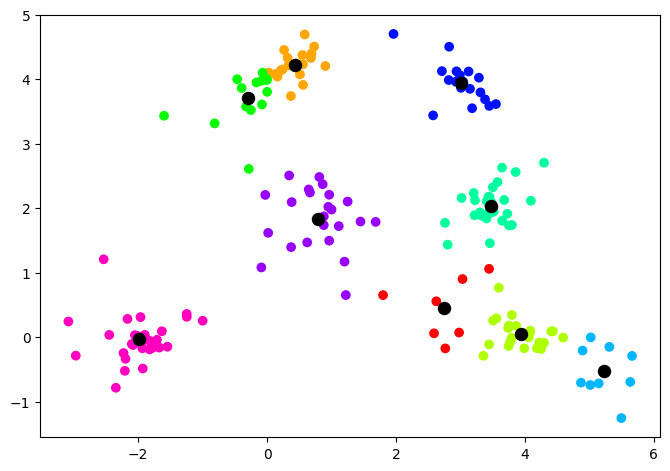

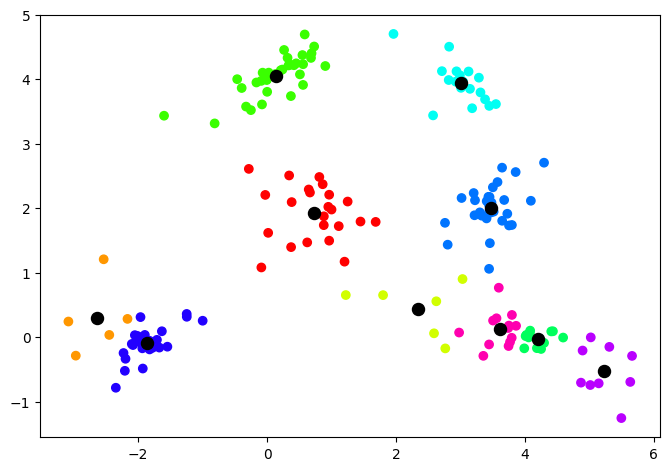

In [65]:

for k in range(2, 11):
  clusters, centroids, objective = minimalobjective(data, k)
  print ("k = Objective =", k, objective)
  plotclusters(clusters, centroids)

The cell below creates a plot that displays how the objective of the best clustering depends on $k$.  This is simply a plot of the ordered pairs that you found in your just-completed work above.  It is sometimes called an *elbow* plot because there is a value of $k$, called the elbow, where the plot flattens out.  At this point, increasing the number of clusters $k$ doesn't really improve the clustering.  It is, therefore, typical to declare the value of $k$ at the elbow to be the one that gives the best clustering.

<Axes: xlabel='0'>

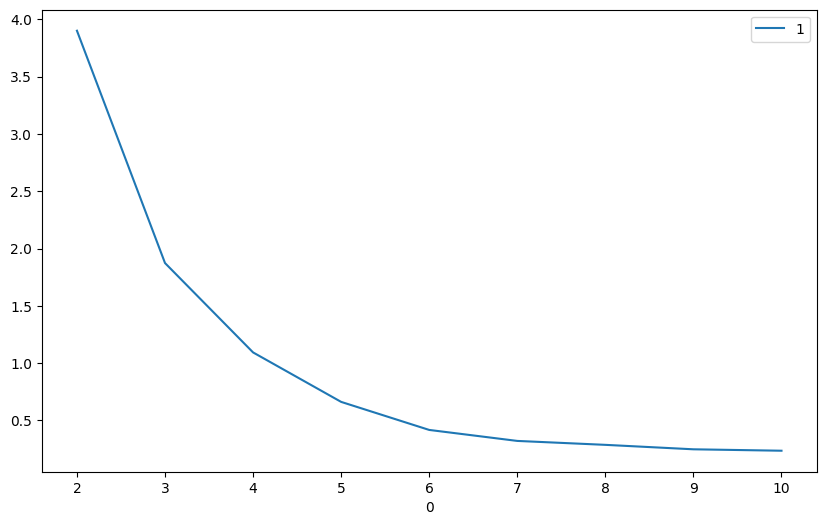

In [66]:
elbow = np.array([[k, minimalobjective(data, k)[2]] for k in range(2, 11)])
pd.DataFrame(elbow).set_index(0).plot(figsize=(10,6))

[3] Where do you see the elbow occuring?  What is the value of $k$ we should choose for the best clustering?  How does this compare to your visual assessment of the data and experimenting with $k$-values 2 cells above?  

* *We see the elbow occurring at*
* *We think the best value of $k$ is*
* *In our visual assessment,*

Now enter that value in the cell below and plot the resulting clustering.

Objective = 0.3205878846424665


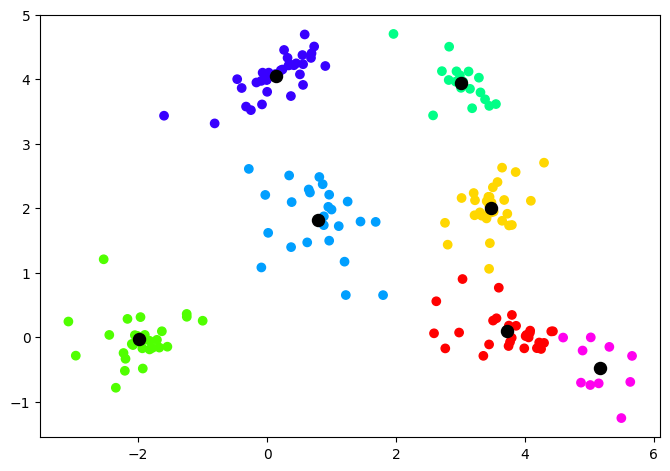

In [67]:
k = 7  # your value of k here
clusters, centroids, objective = minimalobjective(data, k)
print ("Objective =", objective)
plotclusters(clusters, centroids)

In practice, we often work with datasets in many dimensions (more than three) that cannot be easily visualized.  The $k$-means algorithm still works then and can give us a way of organizing and exploring the data.

[3] In conclusion, write a paragraph that explains, in your own words, the big ideas behind the k-means clustering algorithm.

